<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/Multivariable_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multivariate Regression
### Boston House Price

In [106]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

from  statsmodels.stats.outliers_influence import variance_inflation_factor

## Gathering Data

---



In [107]:
boston_dataset = load_boston()

type(boston_dataset)

boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [108]:
dir(boston_dataset)


['DESCR', 'data', 'feature_names', 'filename', 'target']

In [109]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [110]:
print(type(boston_dataset.data))
print(boston_dataset.data.shape)
print(boston_dataset.feature_names)
#print(boston_dataset.target)

<class 'numpy.ndarray'>
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Data explorarion with Pandas dataframes

In [111]:
# Create pandas dataframes

data = pd.DataFrame(data = boston_dataset.data, columns=boston_dataset.feature_names)

# add column (target)

data['Price'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [112]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## Cleaning data : checking for missing values

In [113]:
#pd.isnull(data)
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Data visualization : histograms, distributions and bar charts

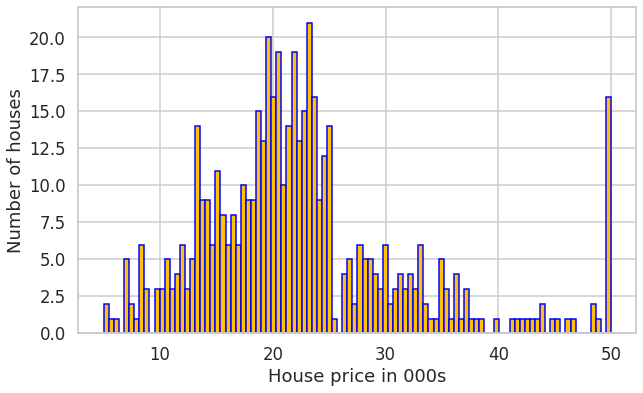

In [115]:
plt.figure(figsize = (10,6))
plt.hist(data["Price"], bins = 100, ec ='blue', color= '#FFC107')
plt.xlabel('House price in 000s')
plt.ylabel('Number of houses')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


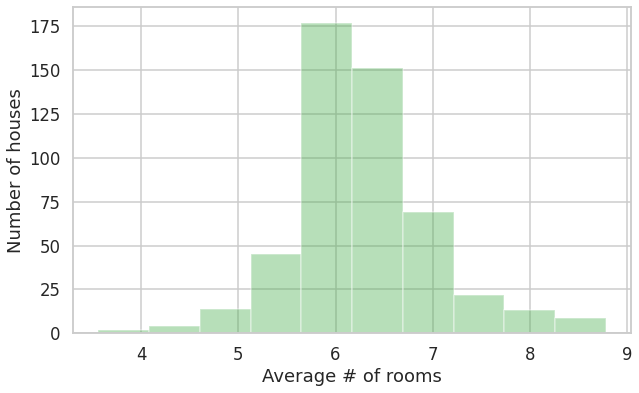

In [116]:
plt.figure(figsize = (10,6))
sns.distplot(data['RM'], bins = 10, kde = False, color = '#4CAF50')
plt.xlabel('Average # of rooms')
plt.ylabel('Number of houses')



plt.show()

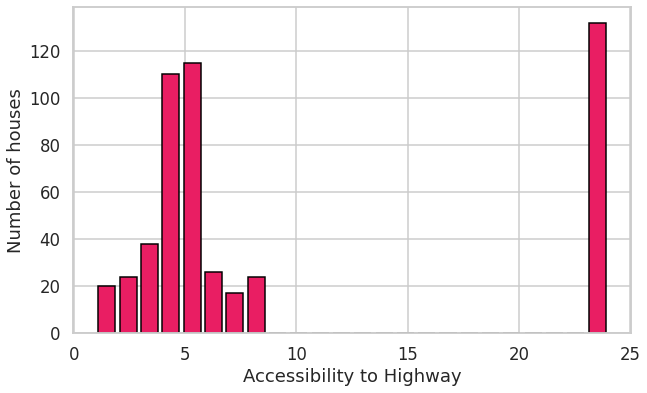

In [117]:
plt.figure(figsize = (10,6))
plt.hist(data['RAD'], bins = 24, ec ='black', color = '#E91E63', rwidth = 0.8)
plt.xlabel('Accessibility to Highway')
plt.ylabel('Number of houses')



plt.show()

In [118]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

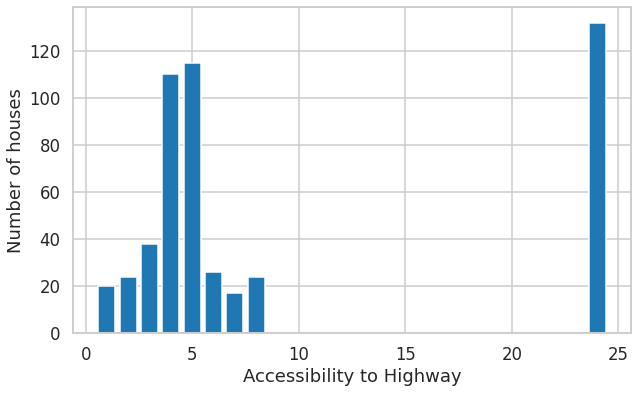

In [119]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]

plt.figure(figsize = (10,6))
plt.bar(frequency.index, height = frequency)
plt.xlabel('Accessibility to Highway')
plt.ylabel('Number of houses')
plt.show()

In [120]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive statictics

In [121]:
data['Price'].min()
data['Price'].max()
print(data['Price'].median())
print(data['Price'].mean())

21.2
22.532806324110698


In [122]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###  Correlation

### $$\rho_{XY} = corr(X, Y)$$
### $$ -1.0\leq\rho_{XY}\leq +1.0$$

In [123]:
data['Price'].corr(data['RM'])

0.6953599470715393

In [124]:
data['Price'].corr(data['PTRATIO'])

-0.5077866855375616

In [125]:
data.corr() # Pearson correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [126]:
mask = np.zeros_like(data.corr())
#print(mask)
triangle_indices = np.triu_indices_from(mask)
print(triangle_indices)
mask[triangle_indices]= True
mask

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
       12, 12, 13]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
       13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
        9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
       12, 13, 13]))


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [127]:
df1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.triu_indices_from(df1)

(array([0, 0, 0, 1, 1, 2]), array([0, 1, 2, 1, 2, 2]))

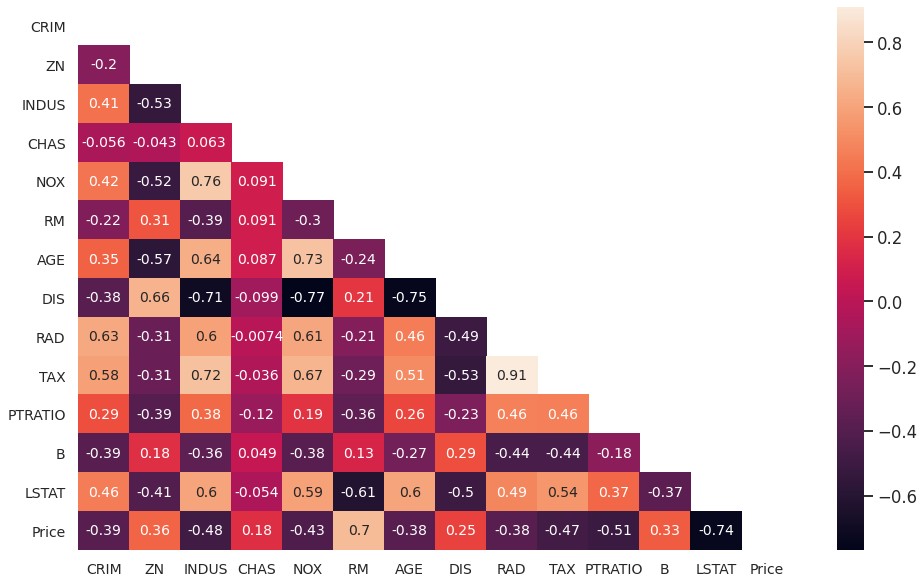

In [128]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), mask = mask, annot = True, annot_kws ={'size' :14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

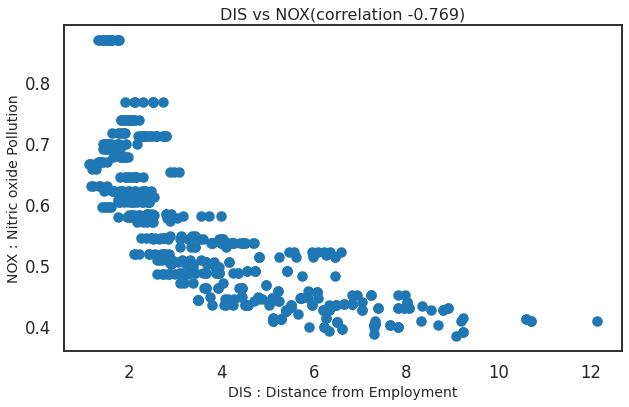

In [129]:
# relationships bwn "DIS" and "NOX" and visualization

nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)
plt.figure(figsize =(10, 6))
plt.scatter(data['DIS'], data['NOX'])
plt.title(f'DIS vs NOX(correlation {nox_dis_corr})', fontsize = 16)
plt.xlabel('DIS : Distance from Employment', fontsize = 14)
plt.ylabel('NOX : Nitric oxide Pollution',fontsize = 14)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


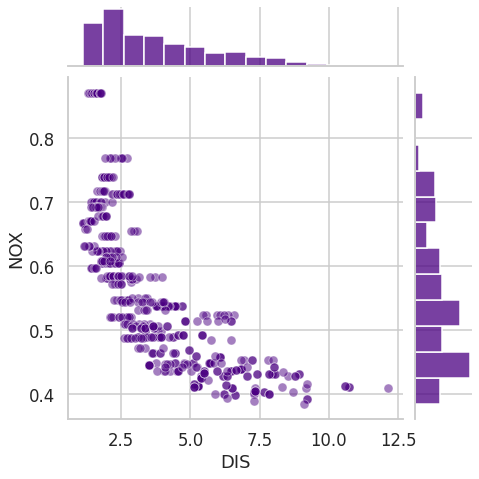

In [130]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['DIS'], data['NOX'], size = 7, color ='indigo', joint_kws = {'alpha' : 0.5})

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


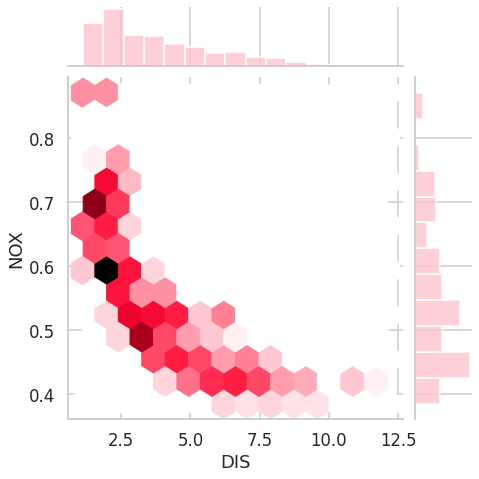

In [131]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['DIS'], data['NOX'], size = 7, color ='pink', kind = 'hex');



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


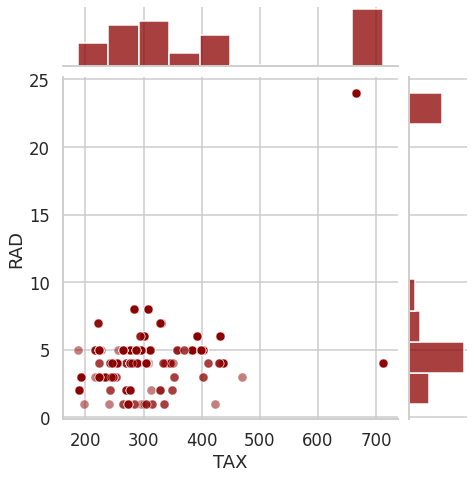

In [132]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['TAX'], data['RAD'], size = 7, color ='darkred', joint_kws = {'alpha' : 0.5})

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


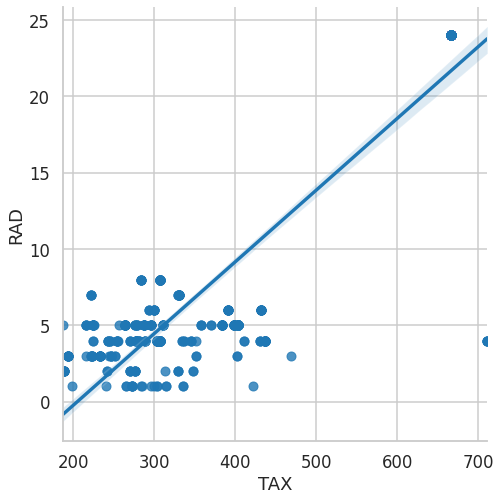

In [133]:
sns.lmplot(x= 'TAX', y='RAD', data = data, size =7)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


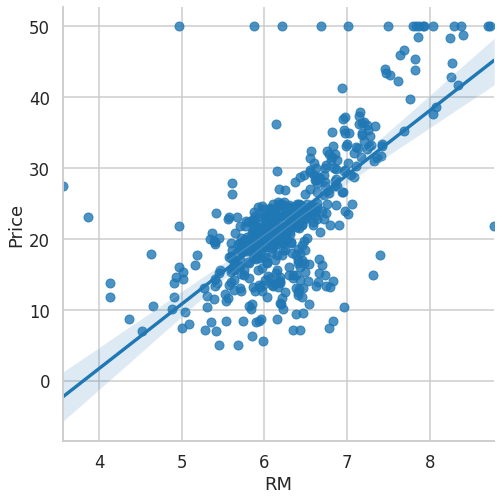

In [134]:
sns.lmplot('RM','Price', data =data, size =7)
plt.show()

In [135]:
def show_plot():
    sns.pairplot(data, kind ='reg', plot_kws ={'line_kws':{'color' : 'pink'}})
    plt.show()



In [136]:
#import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
  #raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))





In [137]:
#%%time
#with tf.device(device_name):
#show_plot()

### Training and Test Dataset split

In [138]:
prices = data['Price']
features = data.drop('Price', axis =1)

# tuple unpacking

x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state =10)


In [139]:
# % of training dataset
len(x_train)/len(features)



0.7984189723320159

In [140]:
# % of test dataset
#x_test.shape[0]/features.shape[0]
len(x_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [141]:
regr = LinearRegression()
regr.fit(x_train, y_train)
# R-squared score for training and test data
print('Training data r-squared :', regr.score(x_train, y_train))
print('Test data r-squred :', regr.score(x_test, y_test))

print('Intercept :', regr.intercept_)
pd.DataFrame(data =regr.coef_, index = x_train.columns, columns = ['coef'])

Training data r-squared : 0.750121534530608
Test data r-squred : 0.6709339839115651
Intercept : 36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [142]:
# R-squared score for training and test data
print('Training data r-squared :', regr.score(x_train, y_train))
print('Test data r-squred :', regr.score(x_test, y_test))

Training data r-squared : 0.750121534530608
Test data r-squred : 0.6709339839115651


## Data transformations

In [143]:
data['Price'].skew()

1.1080984082549072

In [144]:
y_log = np.log(data['Price'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: Price, dtype: float64

In [145]:
y_log.skew()

-0.33032129530987864

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


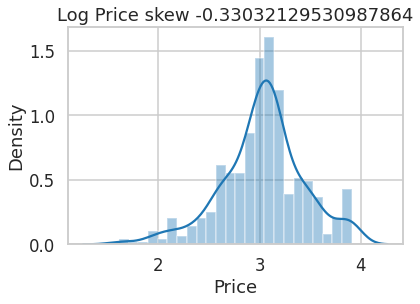

In [146]:

sns.distplot(y_log)
plt.title(f'Log Price skew { y_log.skew()}')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


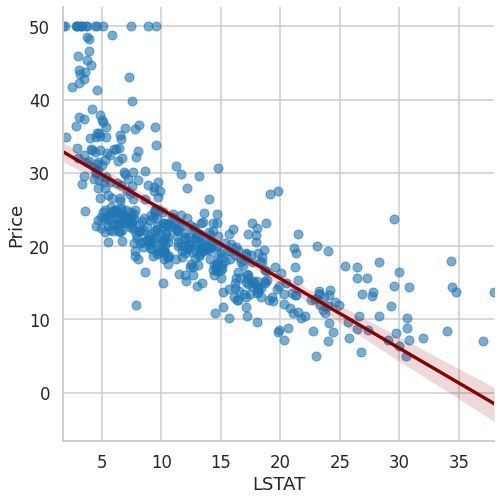

In [147]:
sns.lmplot(x='LSTAT', y = 'Price', data = data, size =7,
           scatter_kws ={'alpha' : 0.6}, line_kws={'color':'darkred'})

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


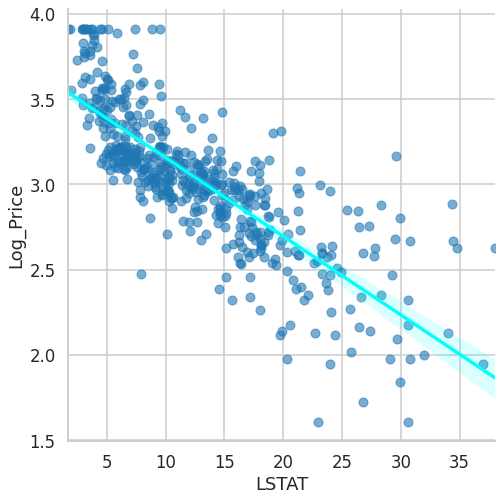

In [148]:
transformed_data = features
transformed_data['Log_Price'] = y_log
sns.lmplot(x='LSTAT', y = 'Log_Price', data = transformed_data, size =7,
           scatter_kws ={'alpha': 0.6},line_kws= {'color':'cyan'})
plt.show()

## Regression with log Prices

In [149]:
prices = np.log(data['Price']) # using log prices
features = data.drop('Price', axis =1)



x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state =10)



regr = LinearRegression()
regr.fit(x_train, y_train)
# R-squared score for training and test data
print('Training data r-squared :', regr.score(x_train, y_train))
print('Test data r-squred :', regr.score(x_test, y_test))

print('Intercept :', regr.intercept_)
pd.DataFrame(data =regr.coef_, index = x_train.columns, columns = ['coef'])

Training data r-squared : 0.7930234826697583
Test data r-squred : 0.7446922306260735
Intercept : 4.059943871775192


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [150]:
# Charls river premium
np.e**0.080331

1.0836456950439142

##P-values and Evaluating coefficient

In [151]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)     # Ordinary Least Squres
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'Coef': results.params, 'p-values ': round(results.pvalues, 4)})

,Coef,p-values
const,4.059944,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


## Testing for Multicollinearity
$$ TAX = \alpha_0+\alpha_1 RM +\alpha_2 NOX +...... +\alpha_{12}LSAT$$
$$ VIF-{TAX} = \frac{1}/{(1 - R_{TAX}^2)}$$

In [152]:
variance_inflation_factor(exog = x_incl_const.values, exog_idx =1)
#print(type(x_incl_const))

1.7145250443932485

In [153]:
len(x_incl_const.columns)

14

In [154]:
for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog =x_incl_const.values, exog_idx = i))

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674638
1.0788133385000578
4.410320817897635
1.8404053075678575
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514064
1.3386713255364717
2.812544292793036


In [155]:
vif = []

for i in range(x_incl_const.shape[1]):
     vif.append(variance_inflation_factor(exog =x_incl_const.values, exog_idx = i))
#print(vif)

pd.DataFrame({'coef_name' : x_incl_const.columns, 'vif':np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [156]:
vif = [variance_inflation_factor(exog =x_incl_const.values, exog_idx = i) for i in range(x_incl_const.shape[1])]

print(*vif, sep='\n')

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674638
1.0788133385000578
4.410320817897635
1.8404053075678575
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514064
1.3386713255364717
2.812544292793036


## Model Simplification and BIC

In [157]:
# Original model with log prices and all features
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)     # Ordinary Least Squres
results = model.fit()


org_coef = pd.DataFrame({'Coef': results.params, 'p-values ': round(results.pvalues, 4)})

print("BIC is", results.bic)
print("R-Squared is", results.rsquared)

BIC is -139.74997769478875
R-Squared is 0.7930234826697583


In [158]:
# Reduced model #1 without INDUS
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, x_incl_const)     # Ordinary Least Squres
results = model.fit()


coef_minus_indus = pd.DataFrame({'Coef': results.params, 'p-values ': round(results.pvalues, 4)})

print("BIC is", results.bic)
print("R-Squared is", results.rsquared)

BIC is -145.1450885559114
R-Squared is 0.7927126289415162


In [159]:
# Reduced model #2 without INDUS and AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS','AGE'], axis=1)

model = sm.OLS(y_train, x_incl_const)     # Ordinary Least Squres
results = model.fit()


reduced_coef = pd.DataFrame({'Coef': results.params, 'p-values ': round(results.pvalues, 4)})

print("BIC is", results.bic)
print("R-Squared is", results.rsquared)

BIC is -149.49934294224678
R-Squared is 0.7918657661852815


In [160]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,Coef,p-values,Coef,p-values,Coef,p-values
const,4.059944,0.0000,4.056231,0.0000,4.035922,0.0000
CRIM,-0.010672,0.0000,-0.010721,0.0000,-0.010702,0.0000
ZN,0.001579,0.0086,0.001551,0.0097,0.001461,0.0141
INDUS,0.002030,0.4445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.0382,0.082795,0.0320,0.086449,0.0249
NOX,-0.704068,0.0000,-0.673365,0.0000,-0.616448,0.0001
RM,0.073404,0.0001,0.071739,0.0001,0.076133,0.0000
AGE,0.000763,0.2092,0.000766,0.2070,NaN,NaN
DIS,-0.047633,0.0000,-0.049394,0.0000,-0.052692,0.0000
RAD,0.014565,0.0000,0.014014,0.0000,0.013743,0.0000


## Modified and Resudual plots

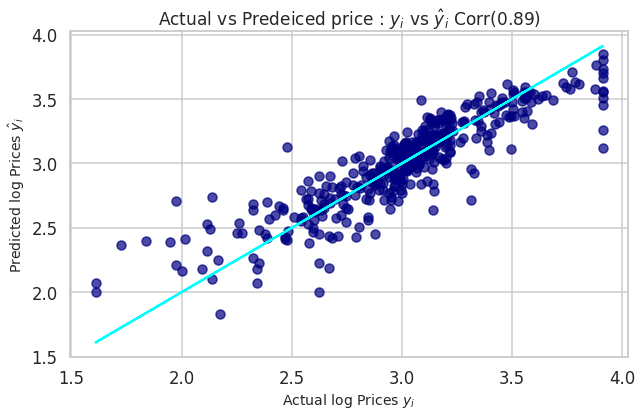

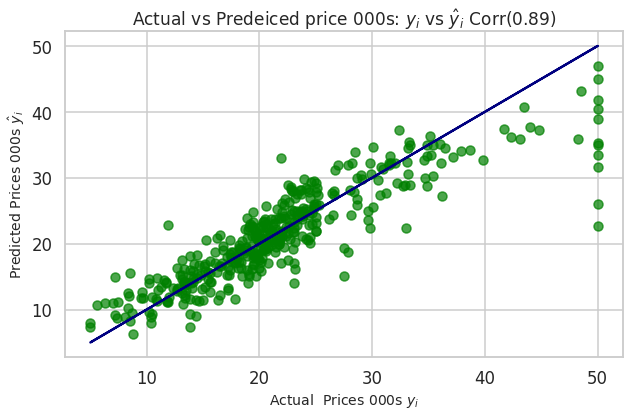

In [161]:
# simplified model with log price and two INDUS and Age features
prices = np.log(data['Price']) # using log prices
features = data.drop(['Price','INDUS','AGE'], axis =1)



x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state =10)

# Using Statmodel

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)     
results = model.fit()

# residuals
# results.resid  
# residuals = y_train - results.fittedvalues

# Graph of actual and predicted log prices

corr= round(y_train.corr(results.fittedvalues), 2)
corr

plt.figure(figsize= (10, 6))
plt.scatter( x = y_train, y= results.fittedvalues, c ='navy', alpha = 0.7)
plt.plot(y_train, y_train, c ='cyan')
plt.xlabel("Actual log Prices $y_i$", fontsize =14)
plt.ylabel ("Predicted log Prices $\hat y_i$", fontsize=14)
plt.title(f'Actual vs Predeiced price : $y_i$ vs $\hat y_i$ Corr({corr})', fontsize =17)

plt.show()

# Actual vs predicted prices

plt.figure(figsize= (10, 6))
plt.scatter( x = np.e**y_train, y= np.e**results.fittedvalues, c ='green', alpha = 0.7)
plt.plot(np.e**y_train, np.e**y_train, c ='navy')
plt.xlabel("Actual  Prices 000s $y_i$", fontsize =14)
plt.ylabel ("Predicted Prices 000s $\hat y_i$", fontsize=14)
plt.title(f'Actual vs Predeiced price 000s: $y_i$ vs $\hat y_i$ Corr({corr})', fontsize =17)

plt.show()

# Mean Squared error and R-Squared Error
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [162]:
# Distribution of Residucals (log Prices for checking nomarlity)

In [163]:
resid_mean = round(results.resid.mean(), 3)
print(resid_mean)
resid_skew = round(results.resid.skew(), 3)
print(resid_skew)

-0.0
0.118


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Price model :residuals skew(0.118) Mean (-0.0)')

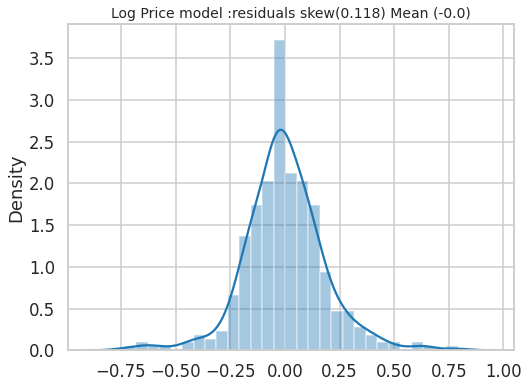

In [164]:
plt.figure(figsize=(8,6))
sns.distplot(results.resid)
plt.title(f'Log Price model :residuals skew({resid_skew}) Mean ({resid_mean})', size = 14)

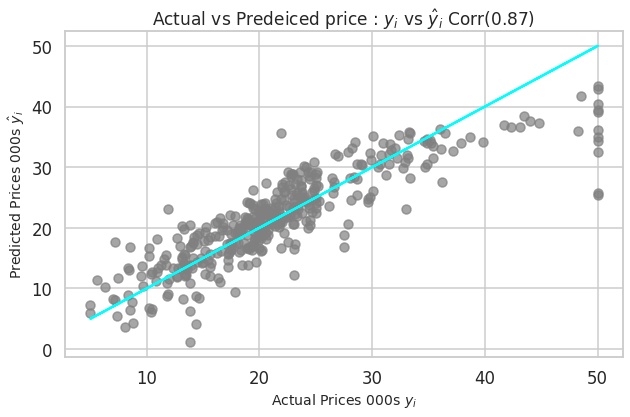

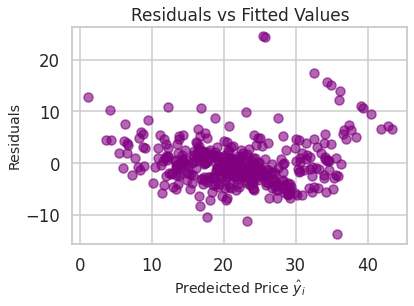

<Figure size 576x432 with 0 Axes>

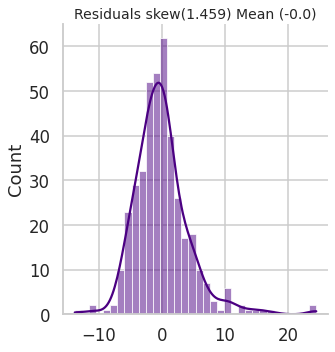

In [165]:
# Model omitting key feature using log prices
prices = data['Price']
features = data.drop(['Price'], axis =1)



x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state =10)

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)     
results = model.fit()


# Graph of actual and predicted log prices

corr= round(y_train.corr(results.fittedvalues), 2)
corr

plt.figure(figsize= (10, 6))
plt.scatter( x = y_train, y= results.fittedvalues, c ='grey', alpha = 0.7)
plt.plot(y_train, y_train, c ='cyan')
plt.xlabel("Actual Prices 000s $y_i$", fontsize =14)
plt.ylabel ("Predicted Prices 000s $\hat y_i$", fontsize=14)
plt.title(f'Actual vs Predeiced price : $y_i$ vs $\hat y_i$ Corr({corr})', fontsize =17)

plt.show()

# Residuals and Predicted Price

plt.scatter(x=results.fittedvalues, y = results.resid, color ="purple", alpha =0.6)
plt.xlabel('Predeicted Price $\hat y_i$', size = 14)
plt.ylabel('Residuals', size=14)
plt.title('Residuals vs Fitted Values', size=17)

plt.show()

# Residual distribution chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
plt.figure(figsize=(8,6))
sns.displot(results.resid, color ='indigo', kde = True)
plt.title(f'Residuals skew({resid_skew}) Mean ({resid_mean})', size = 14)

plt.show()

# Mean Squared error and R-Squared Error
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

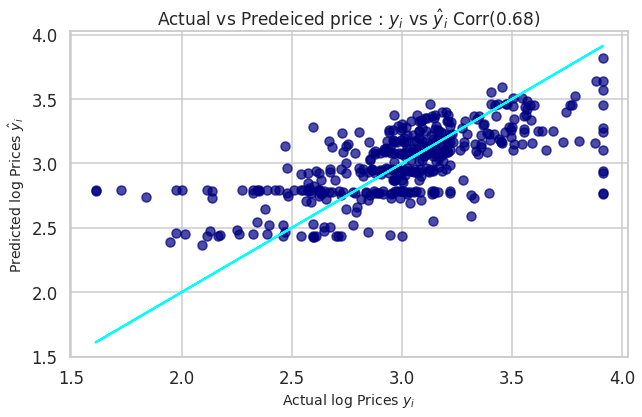

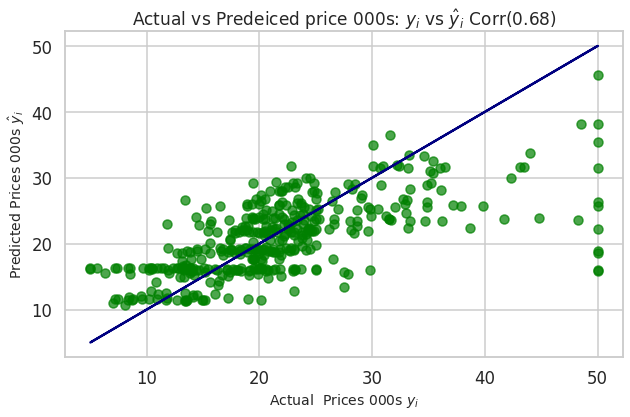

In [166]:
# Model Omitting key features using log price
prices = np.log(data['Price']) # using log prices
features = data.drop(['Price','INDUS','AGE','LSTAT','RM','NOX','CRIM'], axis =1)



x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state =10)

# Using Statmodel

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)     
results = model.fit()

# residuals
# results.resid  
# residuals = y_train - results.fittedvalues

# Graph of actual and predicted log prices

corr= round(y_train.corr(results.fittedvalues), 2)
corr

plt.figure(figsize= (10, 6))
plt.scatter( x = y_train, y= results.fittedvalues, c ='navy', alpha = 0.7)
plt.plot(y_train, y_train, c ='cyan')
plt.xlabel("Actual log Prices $y_i$", fontsize =14)
plt.ylabel ("Predicted log Prices $\hat y_i$", fontsize=14)
plt.title(f'Actual vs Predeiced price : $y_i$ vs $\hat y_i$ Corr({corr})', fontsize =17)

plt.show()

# Actual vs predicted prices

plt.figure(figsize= (10, 6))
plt.scatter( x = np.e**y_train, y= np.e**results.fittedvalues, c ='green', alpha = 0.7)
plt.plot(np.e**y_train, np.e**y_train, c ='navy')
plt.xlabel("Actual  Prices 000s $y_i$", fontsize =14)
plt.ylabel ("Predicted Prices 000s $\hat y_i$", fontsize=14)
plt.title(f'Actual vs Predeiced price 000s: $y_i$ vs $\hat y_i$ Corr({corr})', fontsize =17)

plt.show()

# Mean Squared error and R-Squared Error
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [167]:
pd.DataFrame({'R-squared' :[reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
              'MSE': [reduced_log_mse,full_normal_mse, omitted_var_mse],
              'RMSE': np.sqrt([reduced_log_mse,full_normal_mse, omitted_var_mse])},
               index= ['reduced_log','full_normal', 'omitted_var']) 

,R-squared,MSE,RMSE
reduced_log,0.792,0.035,0.187083
full_normal,0.750,19.921,4.463295
omitted_var,0.460,0.090,0.300000


In [168]:
# 30,000 estimated price and upper and lower bound in 95% confidential interval
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('log price of 95% CI upperbound :', upper_bound)
print('price of 95% CI upperbound :', np. e**upper_bound *1000)
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('log price of 95% CI lowerbound :', lower_bound)
print('price of 95% CI lowerbound :', np. e**lower_bound*1000)

log price of 95% CI upperbound : 3.7753631203395495
price of 95% CI upperbound : 43613.34233239937
log price of 95% CI lowerbound : 3.0270316429847615
price of 95% CI lowerbound : 20635.886906824155
